In [1]:
%matplotlib inline

# Georice

Georice processor creates classified maps of the presence of rice fields based on Sentinel 1A and Sentinel 1B imagery. Classification script was creted by CNES.
Sentinel 1 scenes are acquired from [Sentinel-hub](https://www.sentinel-hub.com/). Processor can not be used without
specifying  of Sentinel hub credentials:
* client_id
* client_secret
* instance_id

Import of Georice proccesor

In [11]:
from georice import Georice

Other libraries

In [12]:
import shapely.geometry
import IPython.display
import matplotlib.pyplot as plt
from matplotlib import colors
from sentinelhub import BBox

Seting SentinelHub credentials

In [13]:
sh_credentials = dict(sh_client_id='e41c5e66-d86b-49ac-90c2-be620fd09fd4',
                      sh_client_secret='[J*kkV/zYBJ-ZJcOh07jb+($6Apk,ddmj>Zjs%_X',
                      instance_id='c99541e0-93ff-44ab-a555-f557ea30610d')
paths = dict(output='/home/jovyan/getting-started/GISAT/rice_output')

Georice.set_credentials(**sh_credentials)

sh_client_id : e41c5e66-d86b-49ac-90c2-be620fd09fd4 was set into SHConfig
sh_client_secret : [J*kkV/zYBJ-ZJcOh07jb+($6Apk,ddmj>Zjs%_X was set into SHConfig
instance_id : c99541e0-93ff-44ab-a555-f557ea30610d was set into SHConfig


Setting of Area of Interest and period:

In [14]:
bbox = 512105.6280661971541122, 1194410.5953210531733930, 530309.7550376804429106, 1207661.2870531221851707
epsg = 32648
name = 'AOI2'
period = ('20180404', '20180504')

In [15]:
IPython.display.GeoJSON(BBox(bbox,crs=epsg).transform(4326).get_geojson())

<IPython.display.GeoJSON object>

Inicialization

In [16]:
task = Georice()

Finding scense for given bbox and period

In [17]:
task.find_scenes(bbox=bbox,
                 epsg=epsg,
                 period=period)

39 were found for period 2018-04-04T00:00:00/2018-08-04T00:00:00
0: satellite: S1A, polarization: DV, rel_orbit_num: 026, orbit_path: ASC
1: satellite: S1A, polarization: DV, rel_orbit_num: 018, orbit_path: DES
2: satellite: S1B, polarization: DV, rel_orbit_num: 026, orbit_path: ASC
3: satellite: S1B, polarization: DV, rel_orbit_num: 018, orbit_path: DES
4: satellite: S1A, polarization: DV, rel_orbit_num: 026, orbit_path: ASC
5: satellite: S1A, polarization: DV, rel_orbit_num: 018, orbit_path: DES
6: satellite: S1A, polarization: DV, rel_orbit_num: 018, orbit_path: DES
7: satellite: S1B, polarization: DV, rel_orbit_num: 026, orbit_path: ASC
8: satellite: S1B, polarization: DV, rel_orbit_num: 018, orbit_path: DES
9: satellite: S1A, polarization: DV, rel_orbit_num: 018, orbit_path: DES
10: satellite: S1A, polarization: DV, rel_orbit_num: 018, orbit_path: DES
11: satellite: S1B, polarization: DV, rel_orbit_num: 026, orbit_path: ASC
12: satellite: S1A, polarization: DV, rel_orbit_num: 026,

To generate rice map is needed to select "orbit_numuber" and "orbit_path". Rice map is generated by calling get_ricemap method. 

Each scene is processed on Sentinel-Hub with Gamma 0 Backscatter Coefficient and scenes are orthorectified. On each scene is applied SAR multi-temporal speckle filter if method argument filtering=True (default)

In [19]:
task.get_ricemap(name, period, orbit_number='018', orbit_path='DES')

Compute outcore... 0%
Error in pid #0 id=<subprocess.Popen object at 0x7fb1685f4a58>
export ITK_GLOBAL_DEFAULT_NUMBER_OF_THREADS=2;otbcli_MultitempFilteringOutcore -progress false -inl /root/output/AOI2/scenes/S1B_AOI2_VH_DES_018_20180605_txxxxxx.tif /root/output/AOI2/scenes/S1B_AOI2_VH_DES_018_20180418_txxxxxx.tif /root/output/AOI2/scenes/S1A_AOI2_VH_DES_018_20180717_txxxxxx.tif /root/output/AOI2/scenes/S1B_AOI2_VH_DES_018_20180524_txxxxxx.tif /root/output/AOI2/scenes/S1B_AOI2_VV_DES_018_20180723_txxxxxx.tif /root/output/AOI2/scenes/S1A_AOI2_VH_DES_018_20180506_txxxxxx.tif /root/output/AOI2/scenes/S1A_AOI2_VV_DES_018_20180729_txxxxxx.tif /root/output/AOI2/scenes/S1A_AOI2_VV_DES_018_20180518_txxxxxx.tif /root/output/AOI2/scenes/S1A_AOI2_VV_DES_018_20180530_txxxxxx.tif /root/output/AOI2/scenes/S1B_AOI2_VV_DES_018_20180524_txxxxxx.tif /root/output/AOI2/scenes/S1A_AOI2_VH_DES_018_20180705_txxxxxx.tif /root/output/AOI2/scenes/S1B_AOI2_VH_DES_018_20180723_txxxxxx.tif /root/output/AOI2/scene

FileNotFoundError: [Errno 2] No such file or directory: '/root/output/AOI2/scenes/filtered'

Acces of scenes. 

Georice class search automatically output folder specified in the config and create attributes associated with names of folders with files. Through these attributes can be accessed downloaded scenes and also specific folder cand be deleted by function delete(). List of valible attributes/folder can be given by:

In [10]:
task.tiles()

['AOI1', 'AOI2']

List of subfolders for specific tiles can be invoked by:

In [11]:
task.AOI1()

['ricemaps', 'scenes']

List of rasters in specyfic subfolders invoked by:

In [12]:
task.AOI1.scenes()

['S1A_AOI1_VV_ASC_026_20180624_txxxxxx.tif',
 'S1A_AOI1_VH_ASC_026_20180730_txxxxxx.tif',
 'S1B_AOI1_VV_DES_018_20180418_txxxxxx.tif',
 'S1B_AOI1_VH_DES_018_20180605_txxxxxx.tif',
 'S1B_AOI1_VH_DES_018_20180524_txxxxxx.tif',
 'S1A_AOI1_VV_DES_018_20180424_txxxxxx.tif',
 'S1B_AOI1_VV_DES_018_20180711_txxxxxx.tif',
 'S1B_AOI1_VH_DES_018_20180430_txxxxxx.tif',
 'S1A_AOI1_VV_ASC_026_20180413_txxxxxx.tif',
 'S1A_AOI1_VH_ASC_026_20180624_txxxxxx.tif',
 'S1B_AOI1_VV_DES_018_20180430_txxxxxx.tif',
 'S1B_AOI1_VH_DES_018_20180418_txxxxxx.tif',
 'S1A_AOI1_VH_DES_018_20180424_txxxxxx.tif',
 'S1B_AOI1_VV_DES_018_20180524_txxxxxx.tif',
 'S1B_AOI1_VV_DES_018_20180605_txxxxxx.tif',
 'S1B_AOI1_VH_DES_018_20180711_txxxxxx.tif',
 'S1A_AOI1_VH_ASC_026_20180413_txxxxxx.tif',
 'S1A_AOI1_VV_ASC_026_20180730_txxxxxx.tif',
 'S1B_AOI1_VV_DES_018_20180617_txxxxxx.tif',
 'S1B_AOI1_VH_DES_018_20180723_txxxxxx.tif',
 'S1A_AOI1_VV_DES_018_20180717_txxxxxx.tif',
 'S1A_AOI1_VV_DES_018_20180506_txxxxxx.tif',
 'S1A_AOI1

Each raster scence/rice map has function plot and array. Firs invoke pyplot.imgshow and second return numpy array 

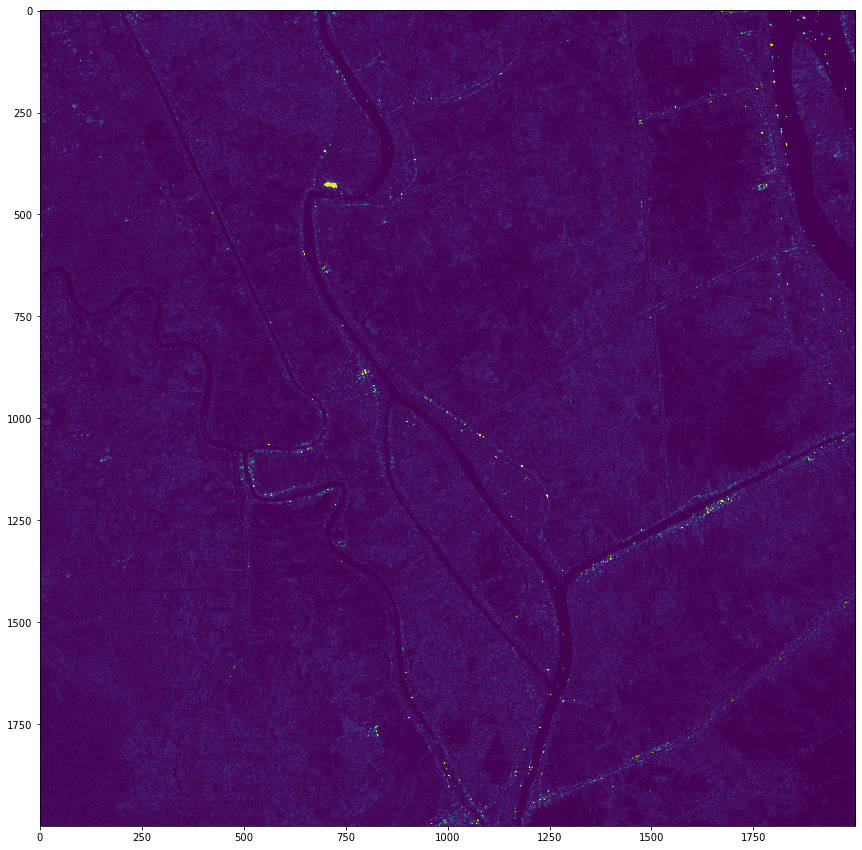

In [23]:
plt.figure(figsize=(15,15))
task.AOI1.scenes.S1A_AOI1_VV_ASC_026_20180531_txxxxxx.plot()

In [24]:
task.AOI1.scenes.S1A_AOI1_VV_ASC_026_20180531_txxxxxx.array()

array([[0.1696, 0.1562, 0.2184, ..., 0.9699, 0.7802, 0.4225],
       [0.2254, 0.1606, 0.1606, ..., 0.0603, 0.1475, 0.2665],
       [0.3451, 0.3451, 0.2831, ..., 0.2531, 0.2843, 0.3434],
       ...,
       [0.1444, 0.1126, 0.045 , ..., 0.0191, 0.0457, 0.049 ],
       [0.1603, 0.0857, 0.0525, ..., 0.0135, 0.0432, 0.0378],
       [0.1307, 0.0902, 0.0634, ..., 0.0342, 0.0432, 0.0328]],
      dtype=float32)

task.AOI1.delete() - will deleted all content of specyfic folder or subfolder. Similar function has also each raster

Generating of rice map

In [40]:
help(Georice.ricemap_get)

Help on function ricemap_get in module georice:

ricemap_get(self, orbit_number, period, direct, inter=False, lzw=False, mask=False, nr=False, delete=True)
     Georie - generation of classified rice map
    "no_data":0, "rice":1, "urban_tree":2, "water":3, "other":4
    
    Generete rice maps for given parameters of orbit number, orbit path and period and save them
    into rice_output path defined.
    orbit_number - orbit number; type: str; - three digits string representation i.e. '018'
    period - starting_date / ending_date => YYYYMMDD, type: tuple('str','str')
    direct - orbit direction; type: str; values ASC - ascending, DES - descending; default = 'DES'
    inter - save intermediate products (min/max/mean/max_increase); type: bool; default = False
    lzv - use LZW compression; type: bool; default = False i.e. DEFLATE
    mask - generate and write rice, trees, water, other and nodata masks; type: bool; default = False
    nr - diable automatic reprojection to EPSG:4326, ty

In [25]:
task.ricemap_get('AOI1','018', period , 'DES')

Ricemap saved into folder: /home/jovyan/getting-started/GISAT/rice_output


Alternatively can be call function get_all that returns rice maps for all combination of orbit number and paths

In [42]:
# task.ricemap_get_all('AOI1')

Rice map visualization

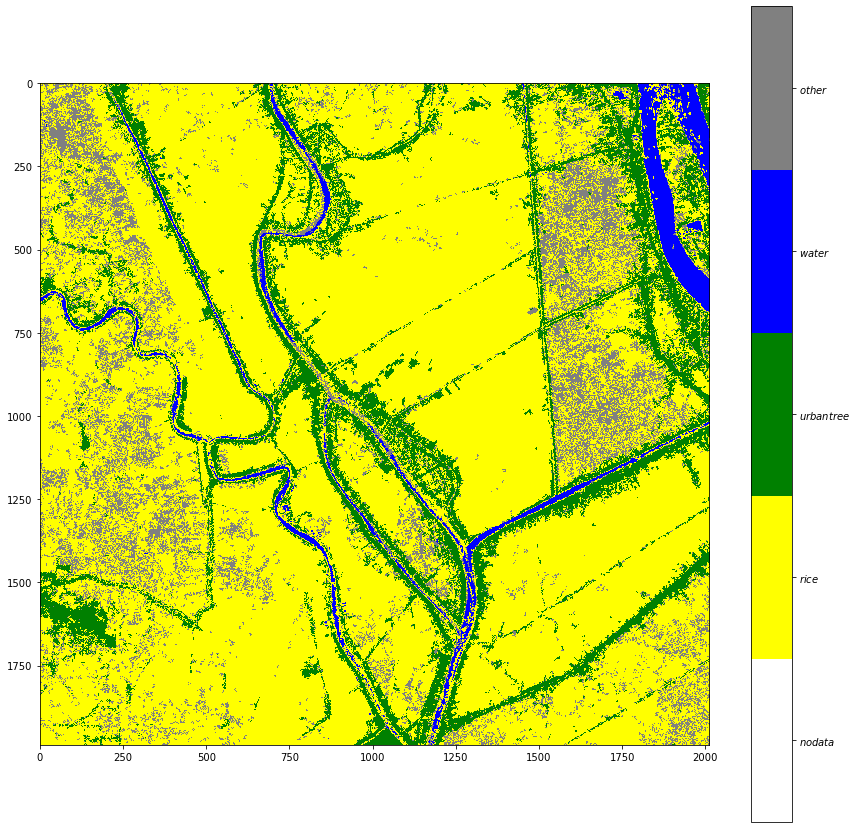

In [11]:
cmap = colors.ListedColormap(['white', 'yellow', 'green', 'blue', 'gray'])
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.figure(figsize=(15,15))

task.AOI1.ricemaps.ricemap_AOI1_DES_018_20180404_20180804.plot(cmap=cmap)

cbar = plt.colorbar(cmap=cmap.N, norm=norm, boundaries=bounds)
cbar.set_ticks([0, 1, 2, 3, 4])
cbar.set_ticklabels(['$nodata$','$rice$','$urbantree$','$water$', '$other$'])